In [1]:
pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 18.4 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=c0e8da8b620c37620b3c1ac1ffaea702faec84ae59d13c62e8ba1bbf1fd934a6
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [2]:
pip install pylift

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
from pylift.eval import UpliftEval
from pylift import TransformedOutcome
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/XL Data.xlsx', sheet_name = 'Main Data')

In [6]:
features = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']

target = 'Response'

treatment = 'Treatment'
df = df[features+[treatment, target]]

In [7]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train.to_csv('drive/MyDrive/Colab Notebooks/train_data.csv', index=False)

In [9]:
test.to_csv('drive/MyDrive/Colab Notebooks/test_data.csv',index=False)

In [10]:
train_data = pd.read_csv('drive/MyDrive/Colab Notebooks/train_data.csv')  # Read training data file
train_data[train_data['Response'] == 1]

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
1,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1
5,0.145939,0.304736,0.755099,0.336596,0.408732,0.393444,1,0.520765,0.141505,0,0.656194,0.976803,0.791383,0.124519,0.480439,0.163638,0.079102,0.479142,0.691237,1,1,1
7,0.447138,0.218195,0.605748,0.270299,0.411240,0.343267,1,0.685207,0.416589,0,0.031726,0.260514,0.477133,0.102071,0.399798,0.218594,0.064004,0.378595,0.231202,1,0,1
17,0.081799,0.628559,0.506974,0.501315,0.632877,0.359665,1,0.903489,0.595778,0,0.832879,0.413163,0.762069,0.013427,0.043984,0.317486,0.904306,0.796326,0.015254,0,1,1
22,0.278423,0.088732,0.029403,0.488508,0.515740,0.415449,0,0.120918,0.308028,1,0.669242,0.830417,0.250299,0.334183,0.438391,0.114177,0.510515,0.024252,0.178255,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,0.807344,0.754828,0.976256,0.542493,0.423010,0.511543,1,0.960524,0.463487,0,0.840896,0.258191,0.854295,0.292729,0.072913,0.416074,0.311932,0.236801,0.085212,0,1,1
3976,0.586531,0.359776,0.995434,0.559901,0.563890,0.544068,1,0.644144,0.418398,0,0.581913,0.575170,0.163859,0.617241,0.561079,0.158652,0.064619,0.320323,0.359844,1,0,1
3978,0.979226,0.791171,0.769909,0.308093,0.811650,0.443794,1,0.890528,0.508294,0,0.757610,0.698009,0.639361,0.751903,0.511342,0.908829,0.242429,0.993044,0.275612,1,0,1
3990,0.108973,0.397247,0.510453,0.414561,0.674852,0.831127,1,0.586592,0.490219,0,0.209822,0.730467,0.236910,0.796745,0.339885,0.454791,0.954342,0.414473,0.925645,0,1,1


In [11]:
# Check number of missing values per column
train_data.isnull().mean()

VAR_1        0.0
VAR_2        0.0
VAR_3        0.0
VAR_4        0.0
VAR_5        0.0
VAR_6        0.0
VAR_7        0.0
VAR_8        0.0
VAR_9        0.0
VAR_10       0.0
VAR_11       0.0
VAR_12       0.0
VAR_13       0.0
VAR_14       0.0
VAR_15       0.0
VAR_16       0.0
VAR_17       0.0
VAR_18       0.0
VAR_19       0.0
VAR_20       0.0
Treatment    0.0
Response     0.0
dtype: float64

In [12]:
test_data =  pd.read_csv('drive/MyDrive/Colab Notebooks/test_data.csv') # Read the test data file
test_data

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.731964,0.650948,0.862505,0.623574,0.664703,0.823695,1,0.413564,0.058211,0,0.602971,0.790230,0.931078,0.354773,0.356037,0.399178,0.741674,0.451390,0.945326,0,1,0
1,0.321621,0.329464,0.948055,0.456419,0.733360,0.504594,0,0.400445,0.224303,0,0.122596,0.989740,0.006237,0.514711,0.099392,0.127896,0.513914,0.727016,0.927689,1,1,0
2,0.280819,0.470046,0.909521,0.688162,0.341352,0.106601,0,0.935463,0.862067,1,0.040708,0.807005,0.791566,0.467652,0.288282,0.387248,0.094154,0.532549,0.264334,0,1,1
3,0.715396,0.318412,0.332842,0.219133,0.640097,0.254051,1,0.462743,0.321278,1,0.302091,0.450263,0.353449,0.087760,0.475170,0.143198,0.357265,0.951959,0.421742,0,1,0
4,0.406659,0.391081,0.525314,0.518497,0.623994,0.216012,1,0.428368,0.367148,0,0.713560,0.079239,0.944309,0.427056,0.203785,0.865163,0.639725,0.762870,0.239617,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.280994,0.834762,0.761961,0.679251,0.243643,0.925944,0,0.632677,0.482703,0,0.753463,0.606945,0.287022,0.172264,0.448227,0.483913,0.313525,0.355177,0.725251,0,1,1
996,0.260435,0.026493,0.921221,0.660229,0.209014,0.127724,0,0.926520,0.501588,1,0.121636,0.946372,0.824303,0.814683,0.731235,0.674666,0.231038,0.280514,0.676319,0,1,0
997,0.353557,0.168535,0.021960,0.020937,0.813046,0.636693,0,0.338364,0.152483,0,0.424412,0.349715,0.100524,0.183937,0.058533,0.905314,0.754487,0.798722,0.335559,0,0,0
998,0.599299,0.012343,0.126314,0.114084,0.745394,0.896842,1,0.563594,0.447290,0,0.723409,0.473444,0.130889,0.086951,0.258778,0.050623,0.214691,0.116398,0.460779,1,1,0


In [13]:
train_data['Treatment'].value_counts()

1    3161
0     839
Name: Treatment, dtype: int64

In [14]:
train_data['Response'].value_counts()

0    3361
1     639
Name: Response, dtype: int64

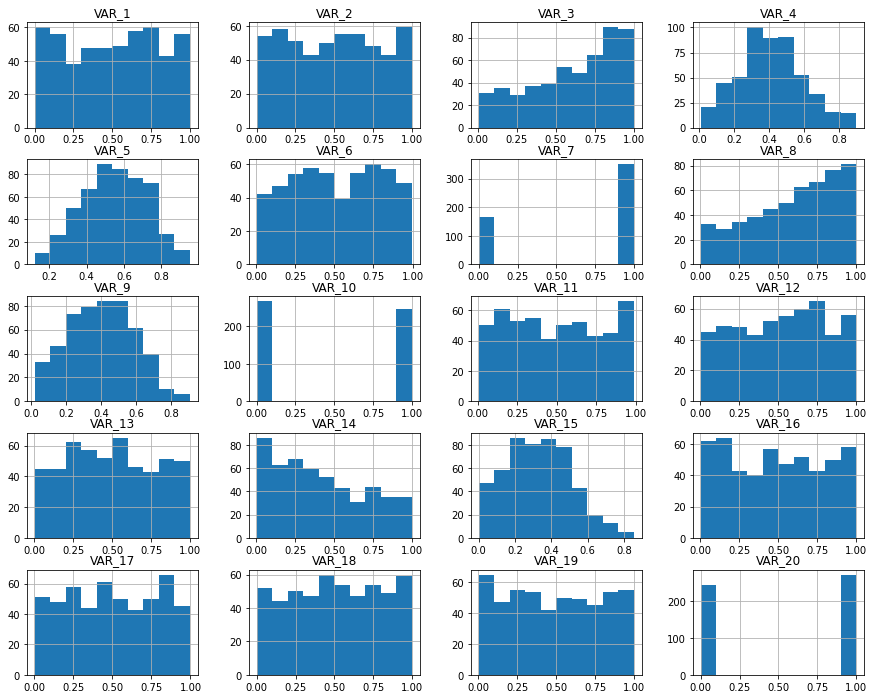

In [15]:
train_data[(train_data['Treatment']==1) & (train_data['Response']==1)][features].hist(figsize=(15,12)); # Persuadables

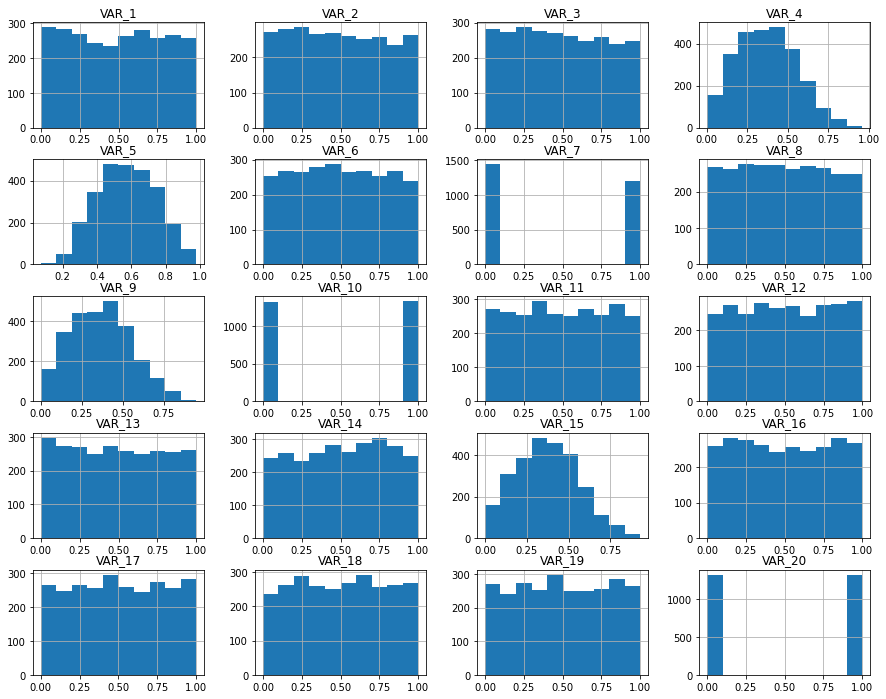

In [16]:
train_data[(train_data['Treatment']==1) & (train_data['Response']==0)][features].hist(figsize=(15,12)); # Do not disturbs

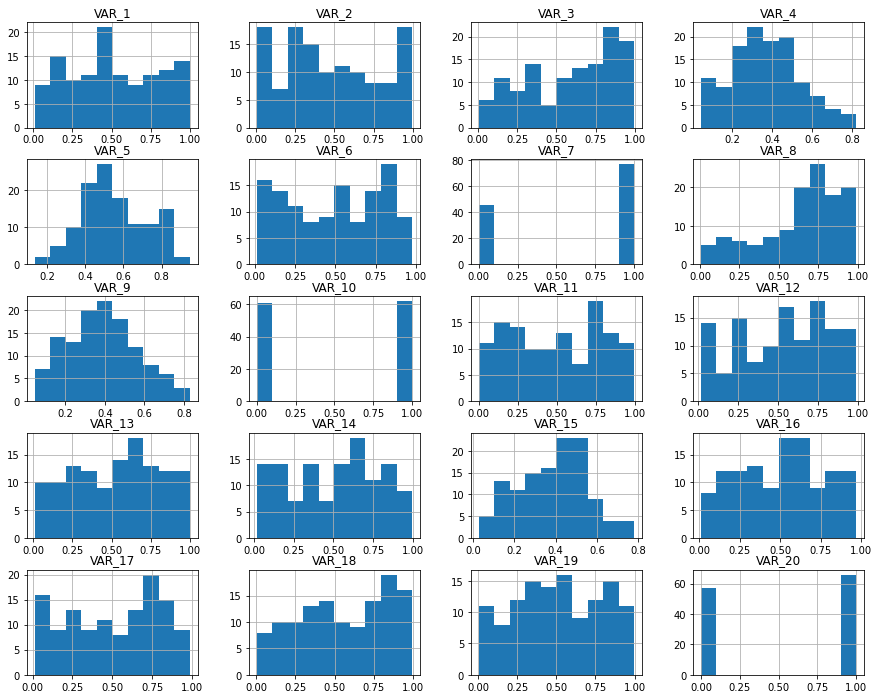

In [17]:
train_data[(train_data['Treatment']==0) & (train_data['Response']==1)][features].hist(figsize=(15,12));  # Sure things

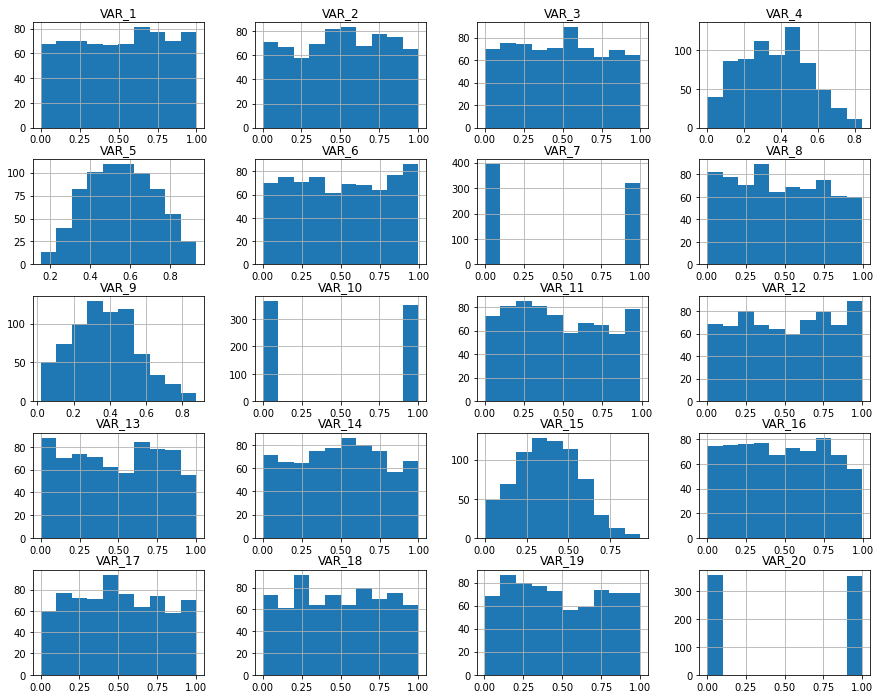

In [18]:
train_data[(train_data['Treatment']==0) & (train_data['Response']==0)][features].hist(figsize=(15,12));  # Lost causes

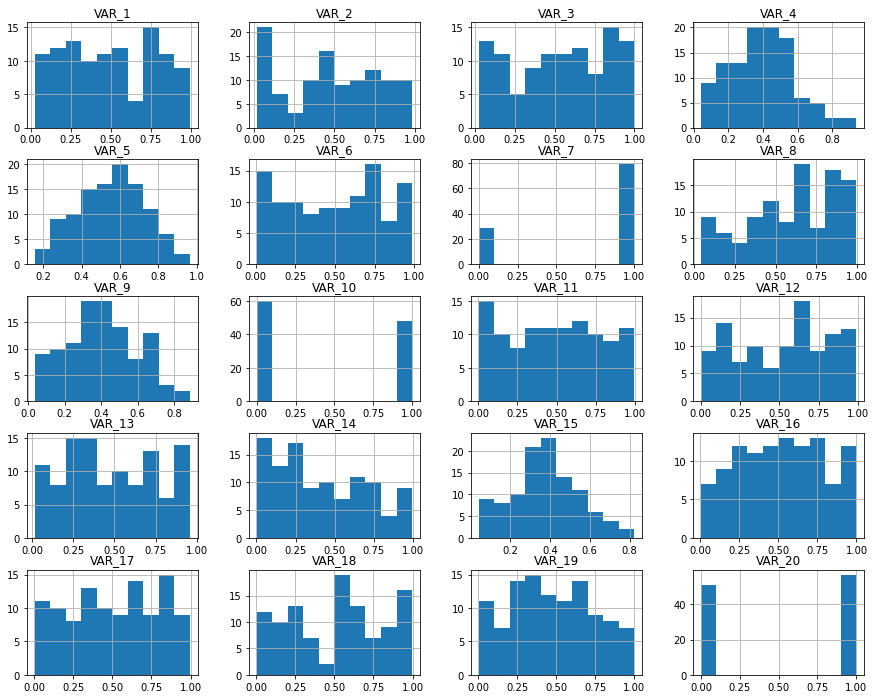

In [19]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==1)][features].hist(figsize=(15,12));  # Persuadables

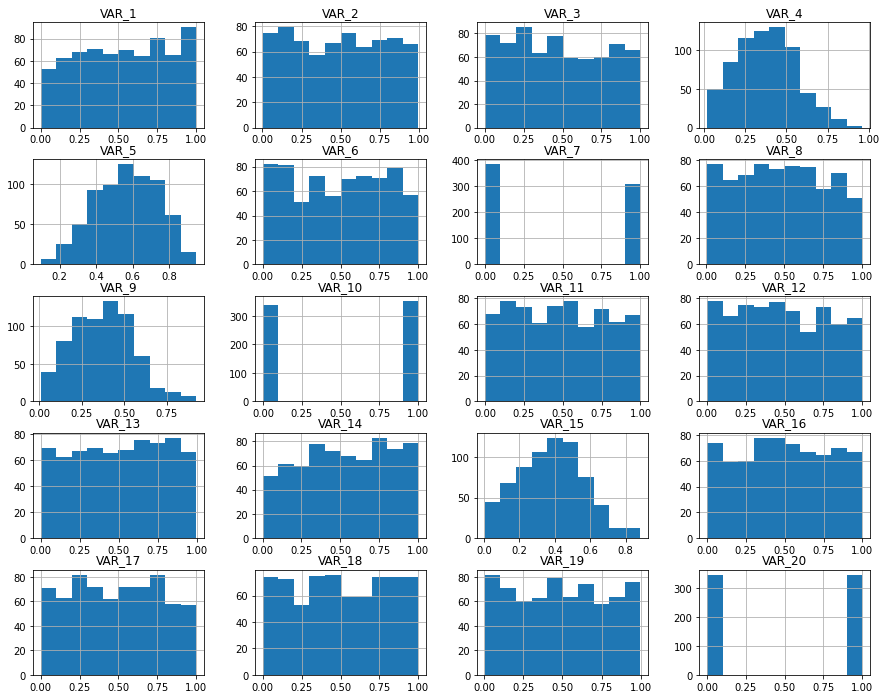

In [20]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==0)][features].hist(figsize=(15,12));  # Do not disturbs

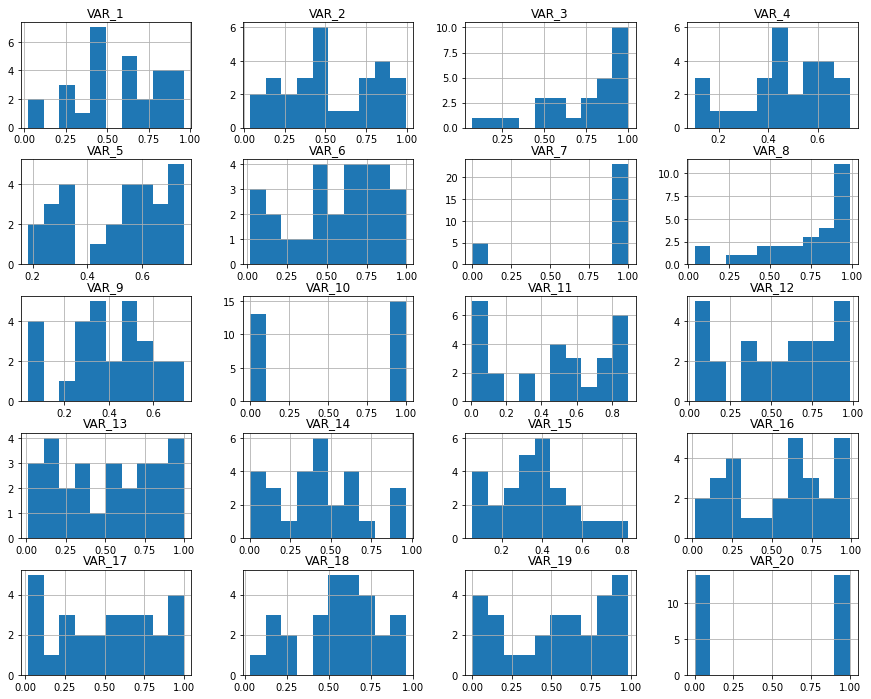

In [21]:
test_data[(test_data['Treatment']==0) & (test_data['Response']==1)][features].hist(figsize=(15,12)); # Sure things

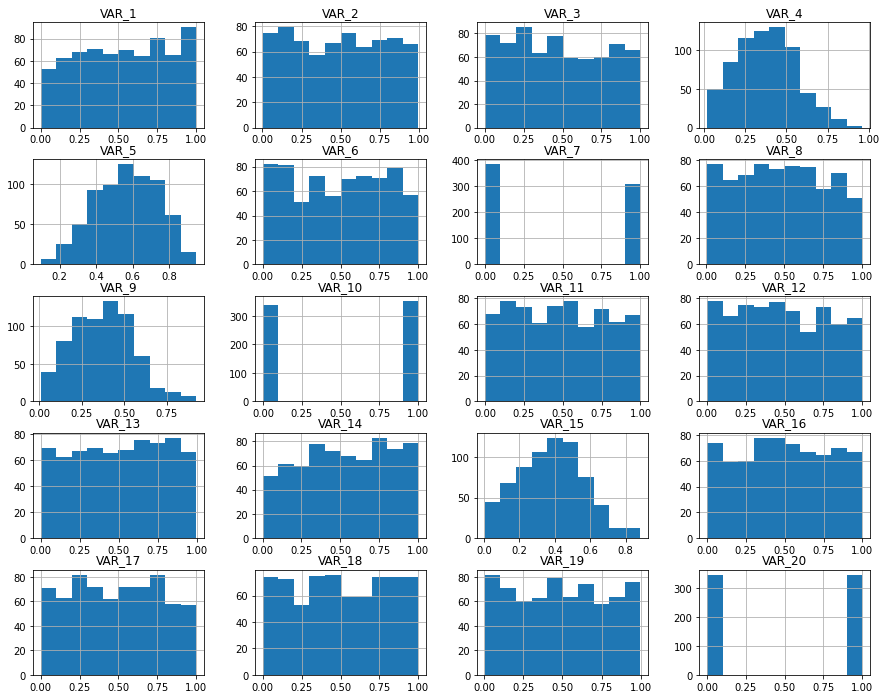

In [22]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==0)][features].hist(figsize=(15,12)); # Lost causes

# **Model 1**

In [23]:
train_data

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.269353,0.977062,0.179054,0.144099,0.488567,0.762235,1,0.978275,0.535037,1,0.366054,0.550901,0.000245,0.417245,0.275430,0.779592,0.493346,0.125137,0.429567,0,1,0
1,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1
2,0.030404,0.830881,0.142175,0.318910,0.752292,0.083491,1,0.557118,0.268049,0,0.569366,0.897666,0.748081,0.198890,0.205935,0.864149,0.402565,0.824356,0.819413,1,0,0
3,0.819759,0.265456,0.260631,0.199446,0.803753,0.729100,1,0.569136,0.100769,0,0.614078,0.866239,0.112927,0.107291,0.527564,0.100724,0.430298,0.938603,0.192437,1,1,0
4,0.743992,0.159823,0.879208,0.592267,0.473591,0.432078,0,0.356458,0.400888,1,0.982192,0.906042,0.401510,0.258004,0.370004,0.330591,0.562990,0.546856,0.885269,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.988969,0.624813,0.246548,0.425238,0.628861,0.767998,0,0.371861,0.257488,1,0.552685,0.725547,0.870904,0.527987,0.143533,0.132731,0.568597,0.508728,0.405572,0,1,0
3996,0.511534,0.484119,0.752265,0.419757,0.535814,0.927086,0,0.550849,0.018799,0,0.168238,0.528954,0.208098,0.736640,0.197265,0.909976,0.695133,0.464865,0.488507,0,0,0
3997,0.968537,0.643728,0.533350,0.282291,0.739330,0.511507,1,0.568850,0.347926,1,0.459460,0.491877,0.903969,0.528230,0.305398,0.863420,0.279405,0.299370,0.973667,1,1,0
3998,0.388078,0.241713,0.654643,0.075139,0.547798,0.380035,1,0.146865,0.046475,1,0.943152,0.538354,0.288556,0.586316,0.284953,0.812166,0.704730,0.164199,0.257781,0,1,0


In [24]:
# split data into train and valid
train, valid = sk.model_selection.train_test_split(train_data, test_size=0.2, random_state=42)

In [25]:
# generate features and labels
Y_train = train['Response']
X_train = train[features+[treatment, target]]

Y_valid = valid['Response']
X_valid = valid[features+[treatment, target]]

In [26]:
Y_train.value_counts()

0    2685
1     515
Name: Response, dtype: int64

In [27]:
Y_valid.value_counts()

0    676
1    124
Name: Response, dtype: int64

In [28]:
X_train

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
3994,0.013662,0.312897,0.452985,0.279013,0.432685,0.369716,0,0.076228,0.393355,0,0.266818,0.725322,0.430350,0.628196,0.766840,0.814237,0.770160,0.133953,0.656955,1,1,0
423,0.594244,0.745124,0.691889,0.265393,0.741464,0.234971,1,0.453454,0.691979,0,0.582482,0.426203,0.307944,0.742409,0.688617,0.944676,0.811777,0.350313,0.753376,0,1,1
2991,0.023971,0.854688,0.905639,0.711403,0.313505,0.708240,1,0.917808,0.224428,1,0.784252,0.304362,0.157332,0.310143,0.228143,0.178009,0.868873,0.202295,0.947869,0,1,1
1221,0.245961,0.829237,0.921224,0.736846,0.596112,0.158527,1,0.837671,0.332580,0,0.341815,0.744364,0.289550,0.133781,0.117466,0.572637,0.881539,0.700463,0.931854,1,0,1
506,0.056248,0.827815,0.055494,0.074312,0.620480,0.179322,1,0.783115,0.041684,0,0.762511,0.685195,0.251118,0.338509,0.217260,0.114664,0.973154,0.375161,0.210513,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.765302,0.868355,0.991410,0.713695,0.295453,0.354879,0,0.478036,0.400016,1,0.057901,0.398621,0.553947,0.956339,0.155069,0.939784,0.169634,0.694866,0.703606,1,1,0
1294,0.458385,0.300049,0.813859,0.452189,0.683828,0.040185,1,0.312380,0.137238,1,0.321389,0.151107,0.625750,0.760491,0.236855,0.024533,0.449605,0.388771,0.929709,1,1,0
860,0.837387,0.775560,0.121633,0.094807,0.794575,0.351808,1,0.423026,0.592357,1,0.857788,0.776129,0.499255,0.940899,0.376372,0.963675,0.837134,0.984950,0.522368,1,1,0
3507,0.642784,0.097069,0.985638,0.434500,0.498136,0.351057,0,0.291211,0.510583,1,0.278690,0.637517,0.738667,0.700320,0.377529,0.802006,0.029548,0.865830,0.836425,1,0,0


In [29]:
# Up sample only the train dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_upsamp, Y_train_upsamp = sm.fit_resample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp)

Y_train_upsamp = pd.Series(Y_train_upsamp)

In [30]:
Y_train_upsamp.value_counts()

0    2685
1    2685
Name: Response, dtype: int64

In [31]:
X_train_upsamp

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.013662,0.312897,0.452985,0.279013,0.432685,0.369716,0,0.076228,0.393355,0,0.266818,0.725322,0.430350,0.628196,0.766840,0.814237,0.770160,0.133953,0.656955,1,1,0
1,0.594244,0.745124,0.691889,0.265393,0.741464,0.234971,1,0.453454,0.691979,0,0.582482,0.426203,0.307944,0.742409,0.688617,0.944676,0.811777,0.350313,0.753376,0,1,1
2,0.023971,0.854688,0.905639,0.711403,0.313505,0.708240,1,0.917808,0.224428,1,0.784252,0.304362,0.157332,0.310143,0.228143,0.178009,0.868873,0.202295,0.947869,0,1,1
3,0.245961,0.829237,0.921224,0.736846,0.596112,0.158527,1,0.837671,0.332580,0,0.341815,0.744364,0.289550,0.133781,0.117466,0.572637,0.881539,0.700463,0.931854,1,0,1
4,0.056248,0.827815,0.055494,0.074312,0.620480,0.179322,1,0.783115,0.041684,0,0.762511,0.685195,0.251118,0.338509,0.217260,0.114664,0.973154,0.375161,0.210513,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,0.528248,0.971067,0.331742,0.241194,0.635921,0.647365,0,0.196859,0.252585,1,0.299031,0.275868,0.493409,0.825972,0.480218,0.244555,0.213849,0.353714,0.365465,1,1,1
5366,0.798482,0.604018,0.587658,0.402813,0.629222,0.826930,0,0.384429,0.243676,1,0.039446,0.501351,0.357386,0.658125,0.383253,0.140475,0.321810,0.667475,0.386822,0,1,1
5367,0.417653,0.819418,0.544825,0.590741,0.487970,0.907416,0,0.425576,0.241490,1,0.214664,0.240463,0.135982,0.223558,0.312800,0.078490,0.803216,0.428316,0.990426,0,1,1
5368,0.889832,0.268089,0.740496,0.447082,0.566256,0.326449,1,0.889870,0.682697,1,0.660475,0.613428,0.330452,0.730994,0.516720,0.696140,0.020250,0.224990,0.889828,0,1,1


# Cross-tabulation of Treatment and Response

In [32]:
pd.crosstab(df['Response'], df['Treatment'], margins = True)

Treatment,0,1,All
Response,,,
0,889,3336,4225
1,151,624,775
All,1040,3960,5000


Cross-tabulation of Treatment and Response in Percentage

In [33]:
pd.crosstab(df['Response'], df['Treatment'], margins = True, normalize=True)

Treatment,0,1,All
Response,,,
0,0.1778,0.6672,0.845
1,0.0302,0.1248,0.155
All,0.2080,0.7920,1.000


In [34]:
df.corr()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
VAR_1,1.000000,0.016869,0.002159,0.001713,0.025439,0.032858,-0.005426,0.009293,-0.003941,-0.001300,0.020781,-0.011411,-0.010715,0.013497,0.006671,0.000235,-0.015993,0.029756,-0.021147,0.003566,-0.020209,-0.001344
VAR_2,0.016869,1.000000,0.023191,0.012092,-0.000631,0.012305,-0.022185,0.011443,-0.006606,-0.036568,0.012509,-0.029005,0.014988,-0.008059,-0.003252,0.009363,-0.000552,0.012013,-0.002597,0.004642,-0.024468,-0.001307
VAR_3,0.002159,0.023191,1.000000,0.400201,-0.203718,-0.006515,-0.005736,0.005231,0.026098,-0.001164,0.015464,-0.005917,0.026042,-0.004947,0.001679,0.015724,0.017767,0.006996,0.014865,0.010261,-0.007944,0.145269
VAR_4,0.001713,0.012092,0.400201,1.000000,-0.510978,-0.012668,0.002126,-0.001727,0.017933,0.001471,0.010634,0.012755,0.020352,0.019112,-0.000050,0.012326,0.012052,0.005999,0.025133,0.014550,0.020438,0.073600
VAR_5,0.025439,-0.000631,-0.203718,-0.510978,1.000000,0.024439,-0.028162,-0.001279,0.001722,0.008258,0.000590,-0.020736,0.001357,-0.005507,0.001582,-0.002346,0.016750,0.022438,-0.016979,0.000111,0.024099,-0.039649
VAR_6,0.032858,0.012305,-0.006515,-0.012668,0.024439,1.000000,0.018153,0.026034,-0.001277,0.005261,-0.000492,-0.011858,-0.009326,0.003087,-0.001051,0.010546,-0.026625,0.008234,-0.003609,-0.011708,-0.012788,0.017726
VAR_7,-0.005426,-0.022185,-0.005736,0.002126,-0.028162,0.018153,1.000000,0.005311,-0.007268,0.019460,-0.012654,-0.016420,0.000688,0.009479,0.035019,-0.009046,-0.035993,-0.007311,-0.025044,-0.002600,0.005071,0.166203
VAR_8,0.009293,0.011443,0.005231,-0.001727,-0.001279,0.026034,0.005311,1.000000,0.409033,-0.006901,-0.017321,0.014672,-0.008711,0.005743,0.011300,0.009705,-0.017379,0.020953,-0.000245,-0.000671,0.018442,0.159210
VAR_9,-0.003941,-0.006606,0.026098,0.017933,0.001722,-0.001277,-0.007268,0.409033,1.000000,-0.006639,0.001085,0.003303,-0.019902,-0.012736,0.008476,0.012453,-0.012481,0.017572,0.027056,0.017308,-0.006056,0.059546
VAR_10,-0.001300,-0.036568,-0.001164,0.001471,0.008258,0.005261,0.019460,-0.006901,-0.006639,1.000000,0.003001,-0.006010,0.008357,0.022848,0.014297,0.000824,0.009244,-0.013416,0.006843,-0.015145,0.012489,-0.013286


# Apply Uplift

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[07:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 0 finished.
[07:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 1 finished.
[07:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 2 finished.
[07:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 3 finished.
[07:41:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Seed 4 finished.


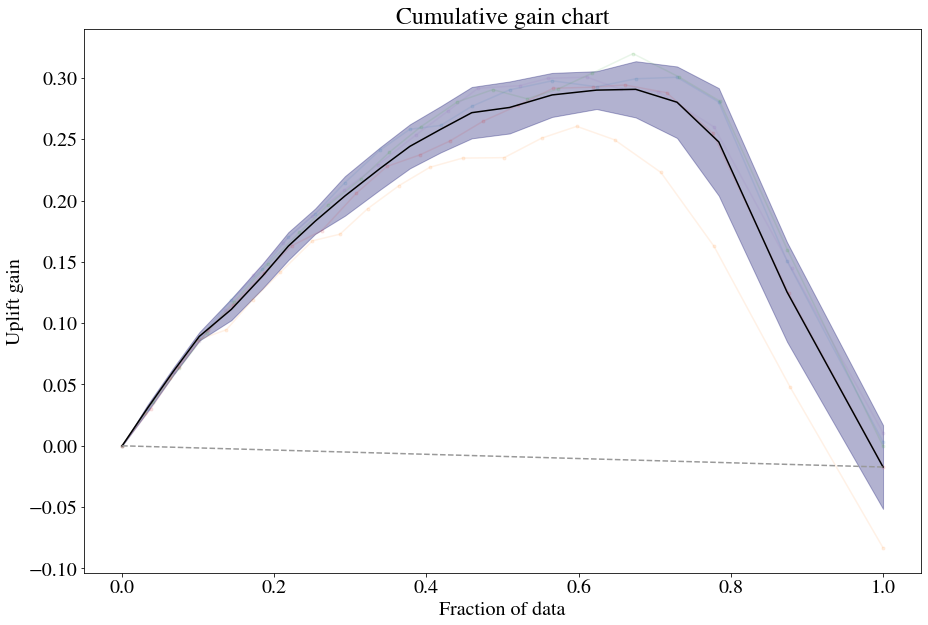

In [35]:
# Uplift model

up = TransformedOutcome(X_train_upsamp, col_treatment='Treatment', col_outcome='Response', stratify=X_train_upsamp['Treatment'])
up.randomized_search(n_iter=20, n_jobs=10, random_state=1)
up.shuffle_fit(params=up.rand_search_.best_params_, nthread=30, iterations=5)
up.plot(show_shuffle_fits=True)

# Fit and hyperparameter tunings

In [64]:
up = TransformedOutcome(X_train_upsamp, col_treatment='Treatment', col_outcome='Response', sklearn_model=RandomForestRegressor)

grid_search_params = {
    'estimator': RandomForestRegressor(),
    'param_grid': {'min_samples_split': [2,3,5,10,30,100,300,1000,3000,10000]},
    'verbose': True,
    'n_jobs': 35,
}
up.grid_search(**grid_search_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=35,
             param_grid={'min_samples_split': [2, 3, 5, 10, 30, 100, 300, 1000,
                                               3000, 10000]},
             refit=False, scoring=make_scorer(_cgains_score), verbose=True)

In [65]:
up.fit()

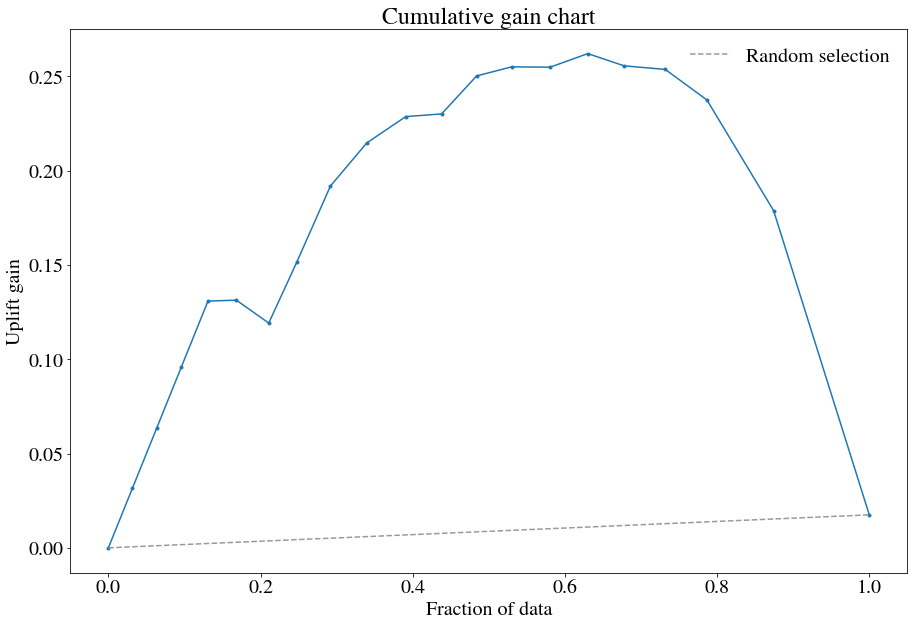

In [66]:

up.plot()

No handles with labels found to put in legend.


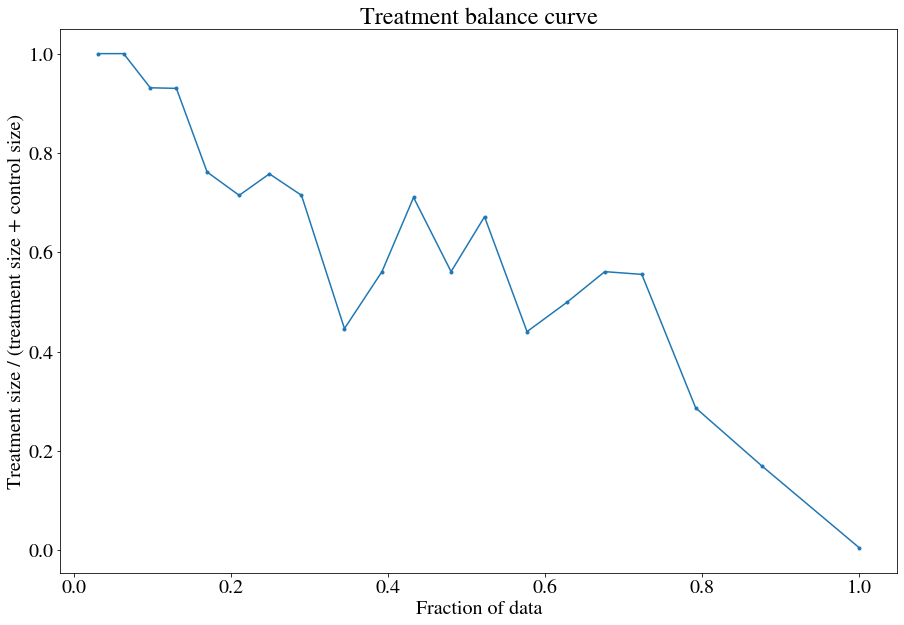

In [39]:
up.plot(plot_type='balance')

In [40]:
up.noise_fit()


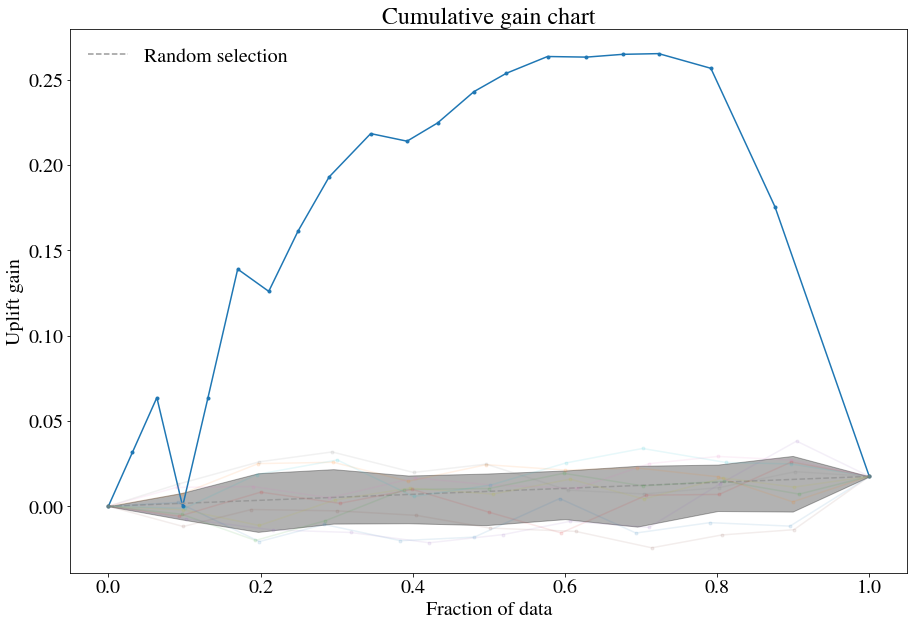

In [41]:
up.plot(show_noise_fits=True)

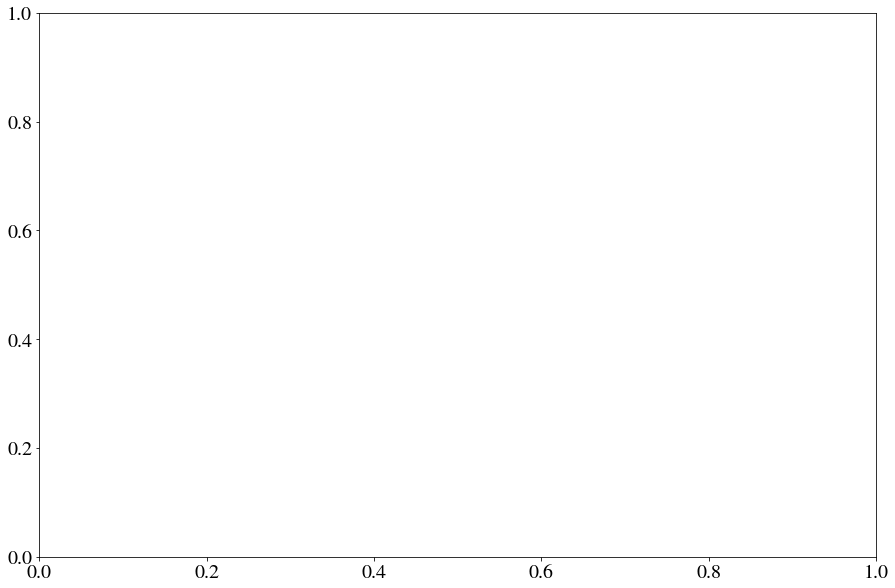

In [42]:
up.plot(plot_type='aqini',
        show_shuffle_fits=True,
        show_random_selection=True,
        shuffle_band_kwargs={'color':[0.7,0.7,0.3], 'alpha':0.3},
        shuffle_lines_kwargs={'color':[0.3,0.3,0.3], 'alpha':0.2},
        shuffle_avg_line_kwargs={'color':[1,0,0]}
       )

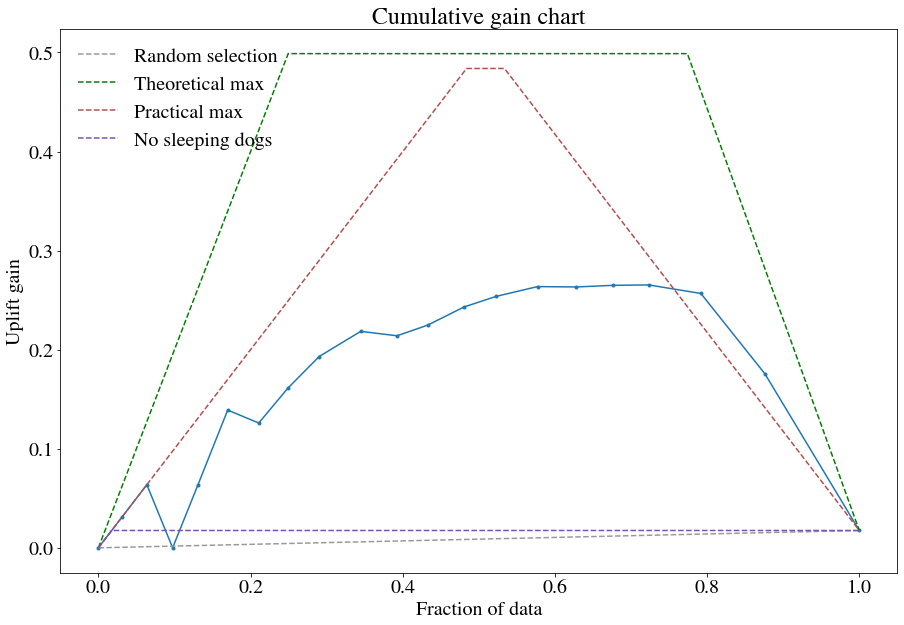

In [43]:
up.plot(show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

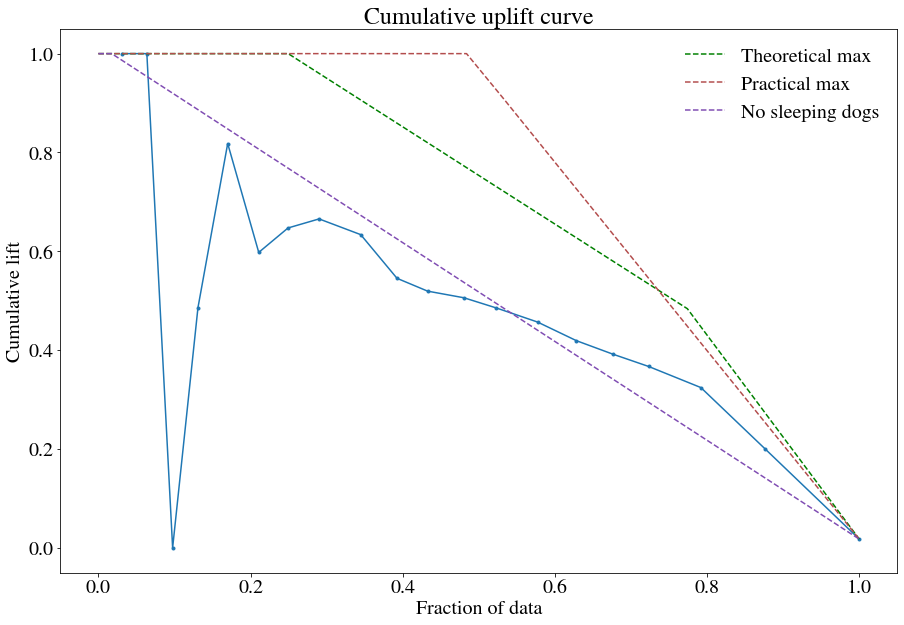

In [44]:
up.plot(plot_type='cuplift', show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

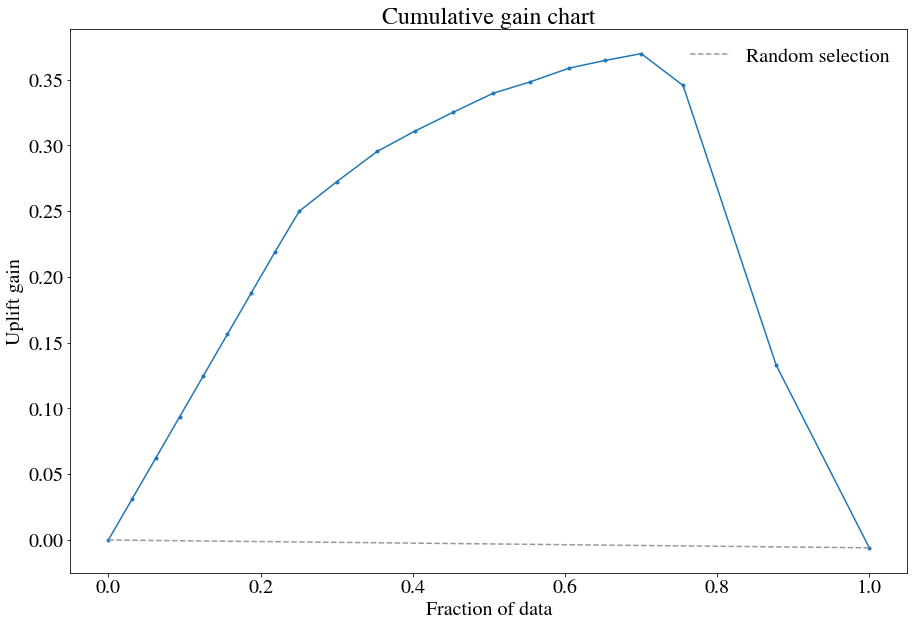

In [45]:

up.train_results_.plot()

These evaluation metrics by default operate on the test set, and are done so through the creation of an UpliftEval class object, stored in up.test_results_. Similar plots can be made for the training data. The data for this is actually already generated during the fitting process, and is stored in up.train_results_, and can be accessed by the routines therein.

In [46]:
X = X_train_upsamp[features+[treatment]]
y = Y_train_upsamp

In [47]:
rfc=RandomForestClassifier(bootstrap = False,
                             max_depth = 6,
                             min_samples_split= 4,
                             n_estimators = 200)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_split=4,
                       n_estimators=200)

In [48]:
rfc_prediction=rfc.predict_proba(X_valid[features+[treatment]])[:,1] > 0.82

Max Cumulative Gain:  0.091


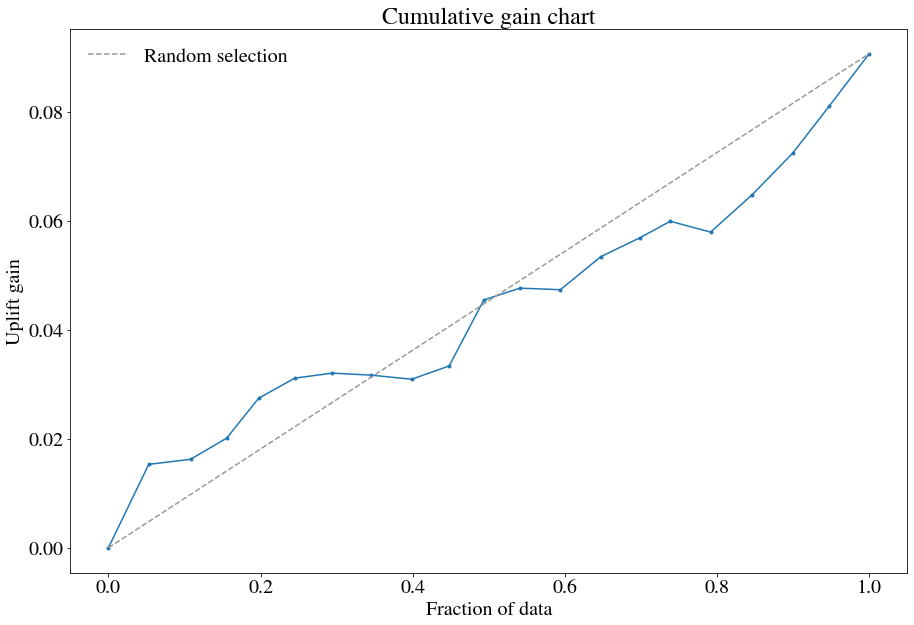

In [49]:
from pylift.eval import UpliftEval
upev = UpliftEval(X_valid[treatment], X_valid[target], rfc_prediction)
print('Max Cumulative Gain: ',np. round (upev.max_cgains,3))
upev.plot(plot_type='cgains')

In [50]:
up.train_results_ 